In [1]:
from mcnpy.endf.read_endf import read_endf
from mcnpy.endf.classes.mf4.plotting import (
    plot_legendre_coefficient_comparison, 
    plot_legendre_coefficient_uncertainties_from_endf,
    plot_legendre_coefficients_from_endf
)

from mcnpy.plotting import PlotBuilder
import numpy as np

In [2]:
# Define file path
Fe56_endf_jendl5 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
Fe56_endf_jeff33 = '/soft_snc/lib/endf/jeff33/neutrons/26-Fe-56g.jeff33'
Fe56_endf_jeff40 = '/soft_snc/lib/endf/jeff40/neutrons/26-Fe-56g.txt'

endf_40 = read_endf(Fe56_endf_jeff40)
endf_33 = read_endf(Fe56_endf_jeff33)
endf_50 = read_endf(Fe56_endf_jendl5)


/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")
/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")
/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


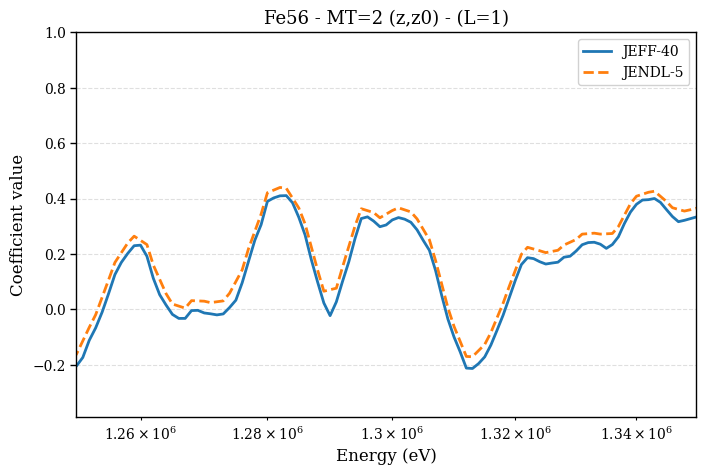

In [3]:
plot_legendre_coefficient_comparison(
    reference_endf = endf_40,
    comparison_endfs = [endf_50],
    mt = 2,
    order = 1,
    energy_range= (1.25e6, 1.35e6),
    style = 'default',
    reference_label = 'JEFF-40',
    comparison_labels = ['JENDL-5'],
)

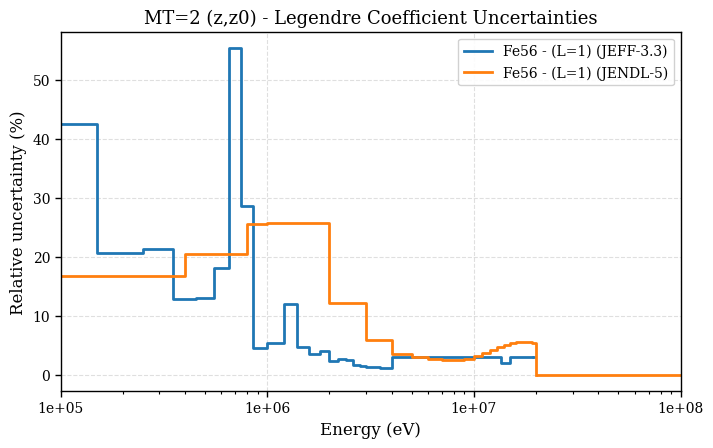

In [4]:
fig_unc = plot_legendre_coefficient_uncertainties_from_endf(
    [endf_33, endf_50], 
    mt=2, 
    orders=[1], 
    uncertainty_type='relative',
    labels=['JEFF-3.3', 'JENDL-5'],
    figsize=(12, 7),
    energy_range=(1e5, 1e8)
)

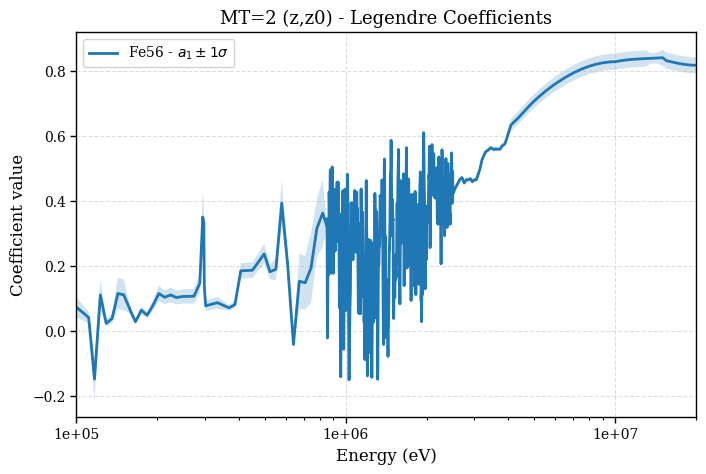

In [5]:
fig = plot_legendre_coefficients_from_endf(
    endf_33, 
    mt=2, 
    orders=[1], 
    style='default',
    include_uncertainties=True,
    uncertainty_sigma=1,
    energy_range=(1e5, 2e7),
)

### API Summary for MF34 Uncertainties

The `to_plot_data` method for MF34 (covariance/uncertainty data) follows the same hierarchy as MF4:

1. **`MF34CovMat.to_plot_data(isotope, mt, order, **kwargs)`** - Base level
   - Works directly on MF34CovMat objects
   - Requires `isotope`, `mt`, and `order` parameters
   
2. **`MF34MT.to_plot_data(order, **kwargs)`** - Intermediate level
   - Works on MF34MT objects
   - Automatically uses isotope and MT from the object
   - Only requires `order` parameter
   
3. **`MF.to_plot_data(mt, order, **kwargs)`** - Next level
   - Works on MF objects (specifically MF34)
   - Requires `mt` and `order` parameters
   
4. **`ENDF.to_plot_data(mf=34, mt, order, **kwargs)`** - Highest level
   - Works on ENDF objects
   - Requires `mf=34`, `mt`, and `order` parameters

**Additional Parameters:**
- `uncertainty_type`: 'relative' (default, returns %) or 'absolute'
- `label`: Custom label for the plot
- Styling parameters: `color`, `linestyle`, `linewidth`, etc.

**Key Benefits:**
- **Unified API**: Same pattern as MF4 plotting system
- **Type-specific PlotData**: Uses `LegendreUncertaintyPlotData` with step plotting by default
- **Flexible**: Extract data at any level of the hierarchy
- **PlotBuilder compatible**: Works seamlessly with the new plotting infrastructure

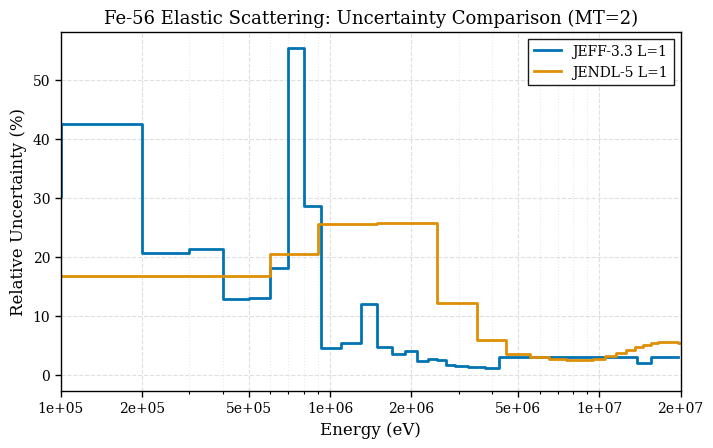

In [6]:
data_set_1 = endf_33.to_plot_data(mf=34, mt=2, order=1)
data_set_2 = endf_50.to_plot_data(mf=34, mt=2, order=1)

builder = (PlotBuilder(style='paper', figsize=(12, 7))
                .add_data(data_set_1, label='JEFF-3.3 L=1')
                .add_data(data_set_2, label='JENDL-5 L=1')
                .set_labels(
                    title='Fe-56 Elastic Scattering: Uncertainty Comparison (MT=2)',
                    x_label='Energy (eV)',
                    y_label='Relative Uncertainty (%)'
                )
                .set_scales(log_x=True)
                .set_limits(x_lim=(1e5, 2e7))
                .build())

### Comparing Uncertainties from Different Libraries

Now let's create a practical comparison plot using the new system:

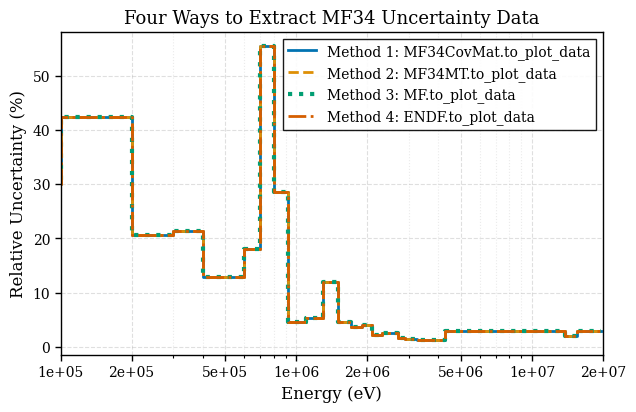

In [7]:
# Method 1: Direct from MF34CovMat object
mf34_covmat = endf_33.mf[34].mt[2].to_ang_covmat()
unc_data1 = mf34_covmat.to_plot_data(isotope=26056, mt=2, order=1)

# Method 2: From MF34MT object (new - requires order parameter)
mf34mt = endf_33.mf[34].mt[2]
unc_data2 = mf34mt.to_plot_data(order=1)

# Method 3: From MF object (new - requires mt and order parameters)
mf34 = endf_33.mf[34]
unc_data3 = mf34.to_plot_data(mt=2, order=1)

# Method 4: From ENDF object (new - requires mf, mt, and order parameters)
unc_data4 = endf_33.to_plot_data(mf=34, mt=2, order=1)

# All four methods produce equivalent data!
# Build a plot to verify
fig = (PlotBuilder(style='paper', figsize=(10, 6))
             .add_data(unc_data1, label='Method 1: MF34CovMat.to_plot_data', linewidth=2)
             .add_data(unc_data2, label='Method 2: MF34MT.to_plot_data', linestyle='--', linewidth=2)
             .add_data(unc_data3, label='Method 3: MF.to_plot_data', linestyle=':', linewidth=3)
             .add_data(unc_data4, label='Method 4: ENDF.to_plot_data', linestyle='-.', linewidth=2)
             .set_labels(
                 title='Four Ways to Extract MF34 Uncertainty Data',
                 x_label='Energy (eV)',
                 y_label='Relative Uncertainty (%)'
             )
             .set_scales(log_x=True)
             .set_limits(x_lim=(1e5, 2e7))
             .build())

---

## New Plotting System for MF34 Uncertainties

The new plotting system has been extended to support MF34 covariance data (uncertainties).
Just like with MF4, we now have a scalable API at multiple levels:

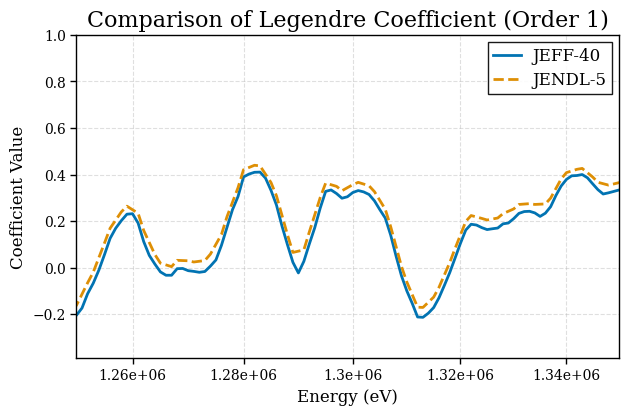

In [8]:
# Import the new plotting infrastructure
from mcnpy.plotting import PlotBuilder

# Extract MF4 data from both ENDF files
mf4_jeff40 = endf_40.mf[4].mt[2]
mf4_jendl5 = endf_50.mf[4].mt[2]

# Create PlotData objects using the .to_plot_data() method
# Reference data (JEFF-40)
data_ref = mf4_jeff40.to_plot_data(order=1)

# Comparison data (JENDL-5)
data_comp = mf4_jendl5.to_plot_data(order=1)

# Example: Explicit font size control
fig = (PlotBuilder(style='paper', figsize=(10, 6))
             .add_data(data_ref, label='JEFF-40', linewidth=2)
             .add_data(data_comp, label='JENDL-5', linestyle='--')
             .set_labels(
                 title='Comparison of Legendre Coefficient (Order 1)',
                 x_label='Energy (eV)',
                 y_label='Coefficient Value'
             )
             .set_font_sizes(
                 title=16,      
                 labels=12,     
                 ticks=10,      
                 legend=12      
             )
             .set_scales(log_x=True)
             .set_limits(x_lim=(1.25e6, 1.35e6))
             .build())


### Benefits of the Scalable API

**Flexibility**: Choose the API level that matches your workflow
- Have a specific MF4MT object? Use the original API
- Working with an MF4 object and want to compare different MT sections? Use the MF-level API
- Want to extract data from multiple MF files? Use the ENDF-level API

**Consistency**: All levels work seamlessly with PlotBuilder

**Extensibility**: The pattern can be extended to other MF files in the future (e.g., MF3 for cross-sections)

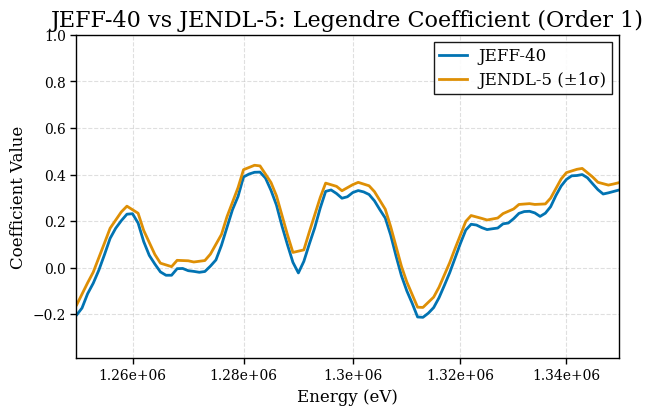

In [11]:
# Using the highest-level API (ENDF.to_plot_data)
# Extract data for JEFF-40 and JENDL-5
data_jeff40= endf_40.to_plot_data(mf=4, mt=2, order=1, label='JEFF-40', include_uncertainty=False)
data_jendl5, unc_jendl5 = endf_50.to_plot_data(mf=4, mt=2, order=1, label='JENDL-5')

# Create the comparison plot
fig = (PlotBuilder(style='paper', figsize=(10, 6))
             .add_data(data_jeff40)
             .add_data(data_jendl5)
             .set_labels(
                 title='JEFF-40 vs JENDL-5: Legendre Coefficient (Order 1)',
                 x_label='Energy (eV)',
                 y_label='Coefficient Value'
             )
             .set_font_sizes(
                 title=16,
                 labels=12,
                 ticks=10,
                 legend=12
             )
             .set_scales(log_x=True)
             .set_limits(x_lim=(1.25e6, 1.35e6))
             .build())

### Comparison Example Using Different API Levels

Now let's recreate the original comparison plot using the highest-level API:

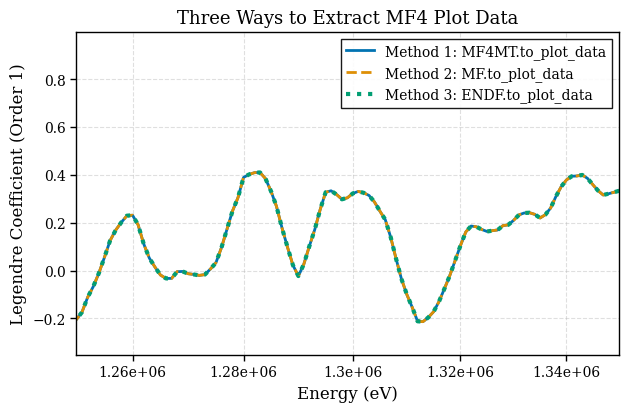

In [22]:
from mcnpy.plotting import PlotBuilder

# Method 1: Direct from MF4MT object (original)
mf4mt_jeff40 = endf_40.mf[4].mt[2]
data_method1 = mf4mt_jeff40.to_plot_data(order=1)

# Method 2: From MF object (new - requires mt parameter)
mf4_jeff40 = endf_40.mf[4]
data_method2 = mf4_jeff40.to_plot_data(mt=2, order=1)

# Method 3: From ENDF object (new - requires mf and mt parameters)
data_method3 = endf_40.to_plot_data(mf=4, mt=2, order=1)

# All three methods produce equivalent data!
# Build a plot to verify
fig = (PlotBuilder(style='paper', figsize=(10, 6))
             .add_data(data_method1, label='Method 1: MF4MT.to_plot_data', linewidth=2)
             .add_data(data_method2, label='Method 2: MF.to_plot_data', linestyle='--', linewidth=2)
             .add_data(data_method3, label='Method 3: ENDF.to_plot_data', linestyle=':', linewidth=3)
             .set_labels(
                 title='Three Ways to Extract MF4 Plot Data',
                 x_label='Energy (eV)',
                 y_label='Legendre Coefficient (Order 1)'
             )
             .set_scales(log_x=True)
             .set_limits(x_lim=(1.25e6, 1.35e6))
             .build())

---

## New Feature: Plotting with Uncertainties Using `include_uncertainty`

The ENDF.to_plot_data() method now supports an `include_uncertainty` parameter that automatically extracts and combines MF4 (nominal values) with MF34 (uncertainties) data.

**Key Features:**
- Returns a tuple: `(PlotData, UncertaintyBand)` when `include_uncertainty=True`
- The `UncertaintyBand` is `None` if MF34 data is not available
- Automatically interpolates uncertainties to match the nominal data energy grid
- Supports `uncertainty_sigma` parameter to control the number of sigmas (default: 1.0)
- Only works with `mf=4` since it combines data from different MF files

**Benefits:**
- Single method call instead of separate MF4 and MF34 queries
- Automatic energy grid alignment between nominal and uncertainty data
- Seamless integration with PlotBuilder
- Same API pattern as the rest of the plotting infrastructure

In [13]:
# Test the new include_uncertainty feature
# Extract MF4 data with uncertainties in a single call
data_with_unc, unc_band = endf_33.to_plot_data(
    mf=4, 
    mt=2, 
    order=1, 
    include_uncertainty=True,
    uncertainty_sigma=1.0,
    label='JEFF-3.3'
)


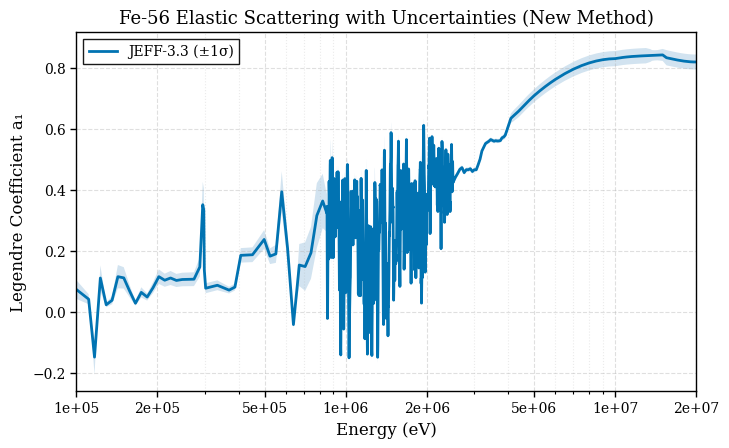

In [14]:
# Build a plot using the new functionality
fig_new = (PlotBuilder(style='paper', figsize=(12, 7))
                .add_data(data_with_unc, uncertainty_band=unc_band)
                .set_labels(
                    title='Fe-56 Elastic Scattering with Uncertainties (New Method)',
                    x_label='Energy (eV)',
                    y_label='Legendre Coefficient a₁'
                )
                .set_scales(log_x=True)
                .set_limits(x_lim=(1e5, 2e7))
                .build())

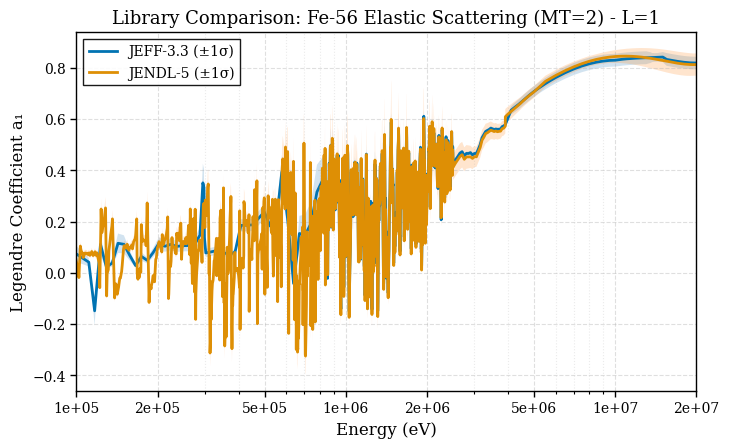

In [15]:
# Compare with multiple libraries using the new method
data_jeff33, unc_jeff33 = endf_33.to_plot_data(mf=4, mt=2, order=1, 
                                                 include_uncertainty=True, 
                                                 label='JEFF-3.3')
data_jendl5, unc_jendl5 = endf_50.to_plot_data(mf=4, mt=2, order=1, 
                                                 include_uncertainty=True, 
                                                 label='JENDL-5')

# Build comparison plot
fig_comparison = (PlotBuilder(style='paper', figsize=(12, 7))
                       .add_data(data_jeff33, uncertainty_band=unc_jeff33)
                       .add_data(data_jendl5, uncertainty_band=unc_jendl5)
                       .set_labels(
                           title='Library Comparison: Fe-56 Elastic Scattering (MT=2) - L=1',
                           x_label='Energy (eV)',
                           y_label='Legendre Coefficient a₁'
                       )
                       .set_scales(log_x=True)
                       .set_limits(x_lim=(1e5, 2e7))
                       .build())

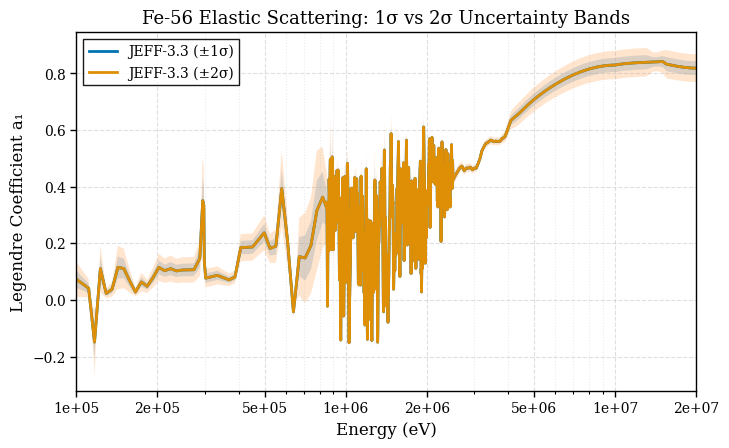

In [ ]:
# Test with different sigma levels
data_2sigma, unc_2sigma = endf_33.to_plot_data(mf=4, mt=2, order=1, 
                                                 include_uncertainty=True,
                                                 uncertainty_sigma=2,
                                                 label='JEFF-3.3')

fig_sigma = (PlotBuilder(style='paper', figsize=(12, 7))
                  .add_data(data_with_unc, uncertainty_band=unc_band)
                  .add_data(data_2sigma, uncertainty_band=unc_2sigma)
                  .set_labels(
                      title='Fe-56 Elastic Scattering: 1σ vs 2σ Uncertainty Bands',
                      x_label='Energy (eV)',
                      y_label='Legendre Coefficient a₁'
                  )
                  .set_scales(log_x=True)
                  .set_limits(x_lim=(1e5, 2e7))
                  .build())

---

## Automatic Tuple Unpacking in PlotBuilder

The `PlotBuilder.add_data()` method now automatically handles tuples returned by `to_plot_data(include_uncertainty=True)`.

**Three equivalent ways to add data with uncertainties:**

```python
# Method 1: Explicit unpacking (old way, still works)
data, unc = endf_33.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=True)
builder.add_data(data, uncertainty_band=unc)

# Method 2: Pass tuple directly - automatic unpacking (NEW!)
data_tuple = endf_33.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=True)
builder.add_data(data_tuple)

# Method 3: Inline - most concise (NEW!)
builder.add_data(endf_33.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=True))
```

**Benefits:**
- **Backward compatible**: Old code with explicit unpacking still works
- **User-friendly**: Users don't need to know about tuples or whether uncertainties exist
- **Flexible**: Can ignore uncertainties by just passing the tuple
- **Clean code**: No need for verbose unpacking when you just want to plot everything

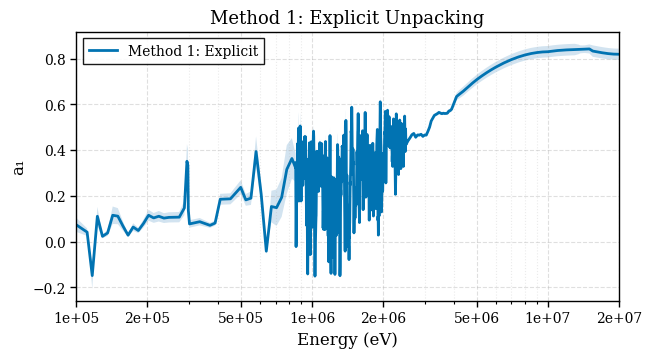

In [17]:
# Demonstration: All three methods produce identical plots

# Method 1: Explicit unpacking
data1, unc1 = endf_33.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=True)
fig1 = (PlotBuilder(style='paper', figsize=(10, 5))
             .add_data(data1, uncertainty_band=unc1, label='Method 1: Explicit')
             .set_labels(title='Method 1: Explicit Unpacking', x_label='Energy (eV)', y_label='a₁')
             .set_scales(log_x=True)
             .set_limits(x_lim=(1e5, 2e7))
             .build())

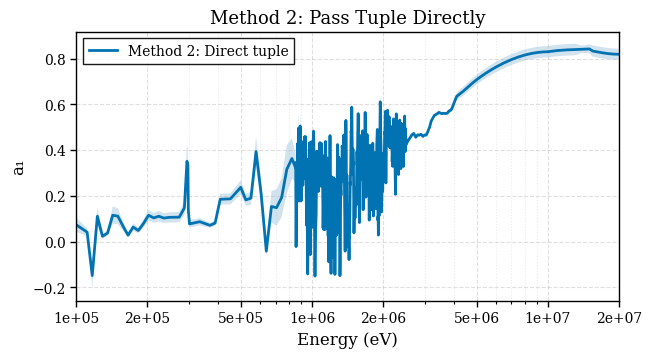

In [19]:
# Method 2: Pass tuple directly
data_tuple = endf_33.to_plot_data(mf=4, mt=2, order=1)
fig2 = (PlotBuilder(style='paper', figsize=(10, 5))
             .add_data(data_tuple, label='Method 2: Direct tuple')
             .set_labels(title='Method 2: Pass Tuple Directly', x_label='Energy (eV)', y_label='a₁')
             .set_scales(log_x=True)
             .set_limits(x_lim=(1e5, 2e7))
             .build())

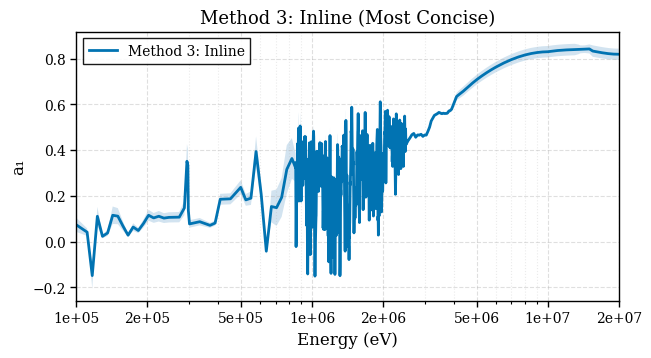

In [20]:
# Method 3: Inline - most concise!
fig3 = (PlotBuilder(style='paper', figsize=(10, 5))
             .add_data(endf_33.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=True), 
                       label='Method 3: Inline')
             .set_labels(title='Method 3: Inline (Most Concise)', x_label='Energy (eV)', y_label='a₁')
             .set_scales(log_x=True)
             .set_limits(x_lim=(1e5, 2e7))
             .build())

✓ Successfully plotted data without uncertainties


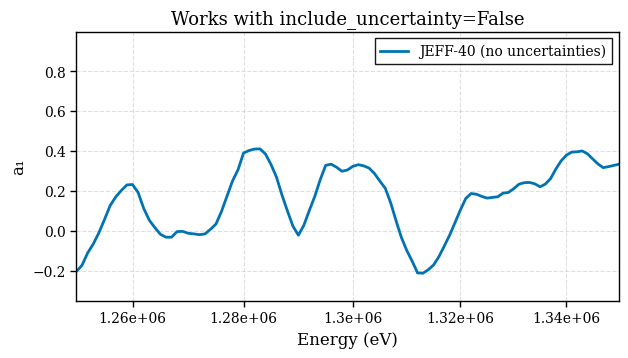

In [21]:
# Test: Works even when include_uncertainty=False (returns single PlotData, not tuple)
fig_no_unc = (PlotBuilder(style='paper', figsize=(10, 5))
                   .add_data(endf_40.to_plot_data(mf=4, mt=2, order=1, include_uncertainty=False), 
                             label='JEFF-40 (no uncertainties)')
                   .set_labels(title='Works with include_uncertainty=False', 
                               x_label='Energy (eV)', y_label='a₁')
                   .set_scales(log_x=True)
                   .set_limits(x_lim=(1.25e6, 1.35e6))
                   .build())

print("✓ Successfully plotted data without uncertainties")